<a href="https://colab.research.google.com/github/ChubVV/mathpracticum-/blob/hometask2/hometask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [2]:

import numpy as np
a = np.random.random((10, 3))
print(a)
for i in range(10):
    print(a[i, np.argmin(np.abs(a[i] - 0.5))])

[[0.71033217 0.06174612 0.64568007]
 [0.09691711 0.83653024 0.43879969]
 [0.44436418 0.31823492 0.24797378]
 [0.22735797 0.17630067 0.80471537]
 [0.68252995 0.23841921 0.44726122]
 [0.33436115 0.81683226 0.09577012]
 [0.28168915 0.35475572 0.15735885]
 [0.40857322 0.26765578 0.36372947]
 [0.55477422 0.83201704 0.52657939]
 [0.07830881 0.97828672 0.89181406]]
0.6456800744322404
0.43879968992035356
0.44436418067527983
0.22735797199161956
0.44726121928663864
0.3343611534816109
0.354755716014572
0.4085732206431083
0.5265793889372874
0.891814056132225


In [ ]:
Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [3]:

b = np.random.random((6,6))
print(b)
for i in range(6):
    print(np.sum(b[i])/np.min(b.transpose()[i]))

[[0.71455241 0.39384509 0.18626231 0.29742709 0.18859728 0.89352924]
 [0.67579623 0.67873934 0.61656624 0.31257089 0.83937106 0.36791714]
 [0.1196365  0.28142564 0.86646406 0.05830402 0.59701527 0.93644265]
 [0.41847572 0.05305406 0.25808593 0.15142814 0.97462376 0.84928713]
 [0.29918709 0.81567571 0.54779703 0.13775405 0.05525764 0.18415743]
 [0.51961887 0.50772872 0.0505181  0.1355843  0.07072153 0.40681221]]
22.352823078420453
65.800069565759
56.59927969920548
46.39396489159982
36.914878812376095
9.18227246490972


In [ ]:
На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x)
print(np.max(np.array([(int)(x[i] == 0) * x[i+1] for i in range(len(x) - 1)])))

[6 2 0 3 0 0 5 7 0]
5


In [ ]:
Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [5]:
f = np.ones(10)
g = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for i in range(g.size):
    f[g[i]] = f[g[i]] + 1
print(f)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [ ]:
Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

In [6]:
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance

In [7]:
from sklearn.metrics import pairwise_distances_argmin
def kmeans(data, k, itera=100, eps=1e-05):
    rand = np.random.RandomState(0)
    r = rand.permutation(data.shape[0])[:k]
    centroids = data[r]
    while itera > 0:
        clusters = pairwise_distances_argmin(data, centroids)
        newcentroids = np.array([data[clusters == r].mean(0) for r in range(k)])
        distoration = distance.cdist(data/100, centroids/100, 'sqeuclidean').min(axis = 1).sum()/k
        if np.max(centroids - newcentroids) < eps:
            break
        centroids = newcentroids
        itera = itera - 1
    return clusters, distoration

In [11]:
С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [8]:

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
distlist = np.empty(10)

In [ ]:
Age - Annual Income

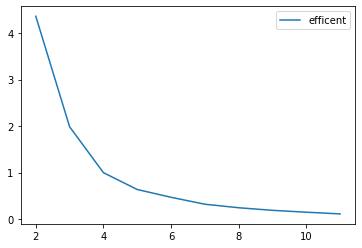

In [22]:
X = np.array([data[:, 2], data[:, 3]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

In [ ]:
K=4

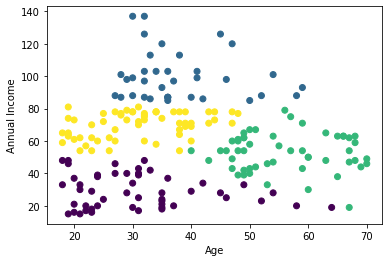

In [23]:
colors, efficent = kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
Age - Spending Score

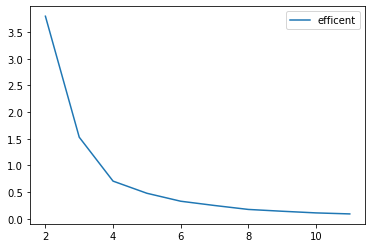

In [24]:
X = np.array([data[:, 2], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

In [ ]:
К=4

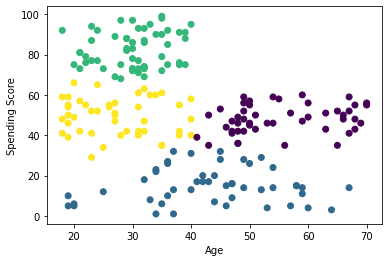

In [25]:
colors, efficent = kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


In [ ]:
Annual Income -  Spending Score

In [ ]:
K=4

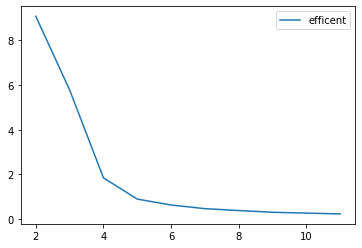

In [26]:
X = np.array([data[:, 3], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

In [ ]:
K=5

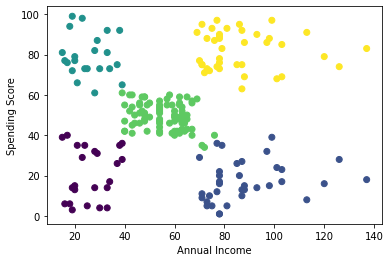

In [27]:
colors, distoration = kmeans(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()